# Autoencoder Neural Network

First, let's import necessary modules + methods

In [1]:
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn.nn import NeuralNetwork
from nn.io import read_text_file, read_fasta_file
from nn.preprocess import sample_seqs, one_hot_encode_seqs
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paste the provided NeuralNetwork class here


Now, let's define the 64x16x64 architecture and train the model

In [2]:
# Define the architecture of the autoencoder
nn_arch = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}
]
# Initialize the NeuralNetwork with the architecture
autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.05, seed = 100, batch_size=16, epochs=90, loss_function='mse')

While a lot of these model parameters may seem arbitrary, I arrived at a learning rate of 0.5 through trial and error. Increasing the number of epochs decreased my validation loss, although with diminishing returns. I couldn't get the model to converge, so more epochs tended to be better. Additionally, the 64x16x64 architecture can be broken into two layers, as shown above: a 64 => 16 layer, followed by a 16 x 64 layer.

In [3]:
# Create a synthetic dataset
dataset = load_digits()
#print(len(dataset["data"][0]))
X_train, X_test, y_train, y_test = train_test_split(dataset["data"], dataset["target"], test_size = 0.2)

In [4]:
train_loss, val_loss = autoencoder.fit(X_train, y_train, X_test, y_test)

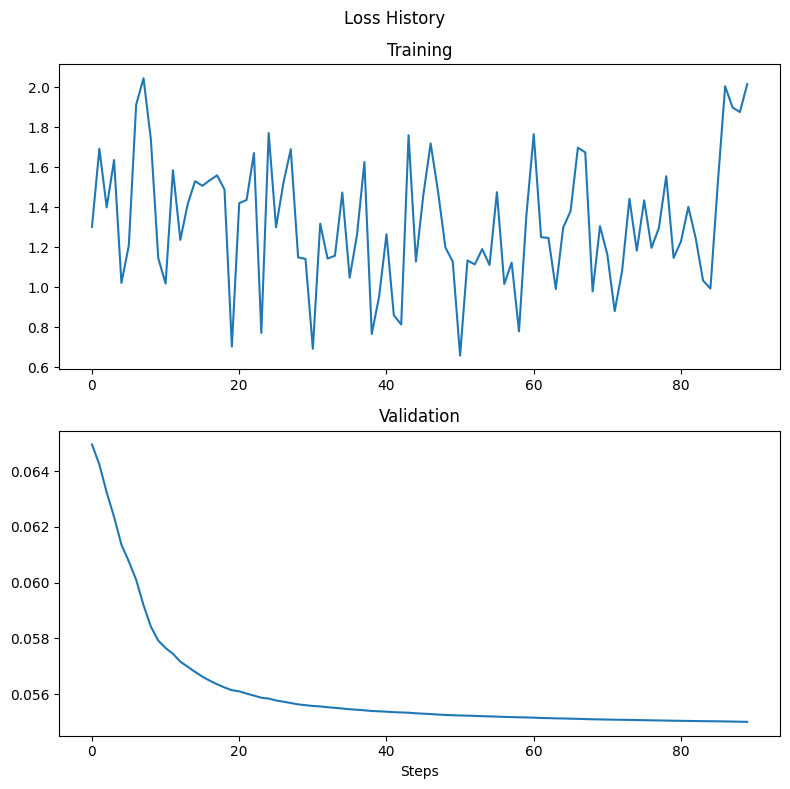

In [5]:
autoencoder._plot_loss_history(train_loss = train_loss, val_loss = val_loss)

Now, I'll train the classifier model

In [6]:
# Define the architecture of the autoencoder
dataset = read_text_file("data/rap1-lieb-positives.txt")
labels = [True for i in range(len(dataset))]
negatives = read_fasta_file("data/yeast-upstream-1k-negative.fa")
negative_labels = [False for i in range(len(negatives))]
#print("negatives: ", len(negatives), negatives[:4])
#print("dataset: ", len(dataset), dataset[:4])
num_negatives = len(negatives) - len(dataset)
#print(num_negatives)
dataset.extend(negatives)
labels.extend(negative_labels)
#print(len(labels), len(dataset), labels[:4], dataset[:4], sep = "\t")
dataset, labels = sample_seqs(dataset, labels)
#print("post_sample_seqs: ", len(dataset), len(labels), labels[:4], dataset[:4], sep = "\t")
dataset = one_hot_encode_seqs(dataset)
#print("post_ohes: ", len(dataset), len(labels), labels[:4], dataset[0], sep = "\t")
#print(dataset[:4])
min_len_seq = min([len(i) for i in dataset])
#print("min_len_seq: ", min_len_seq)
dataset = np.array(dataset)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.2)

nn_arch = [
    {'input_dim': 68, 'output_dim': 32, 'activation': 'sigmoid'},
    {'input_dim': 32, 'output_dim': 8, 'activation': 'sigmoid'},
    {'input_dim': 8, 'output_dim': 1, 'activation': 'sigmoid'}
]
# Initialize the NeuralNetwork with the architecture
autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.15, seed = 1000, batch_size=10, epochs=15, loss_function='bce')

I needed a higher of a learning rate for this task (0.15). And since we're doing a binary classification task, a sigmoid activation combined with a binary cross entropy loss was appropriate for this task. If I had to do a more complex classifier training, I probably would have implemented early stopping to prevent my validation loss from growing after hitting a minimum.

In [8]:
train_loss, val_loss = autoencoder.fit(X_train, y_train, X_test, y_test)

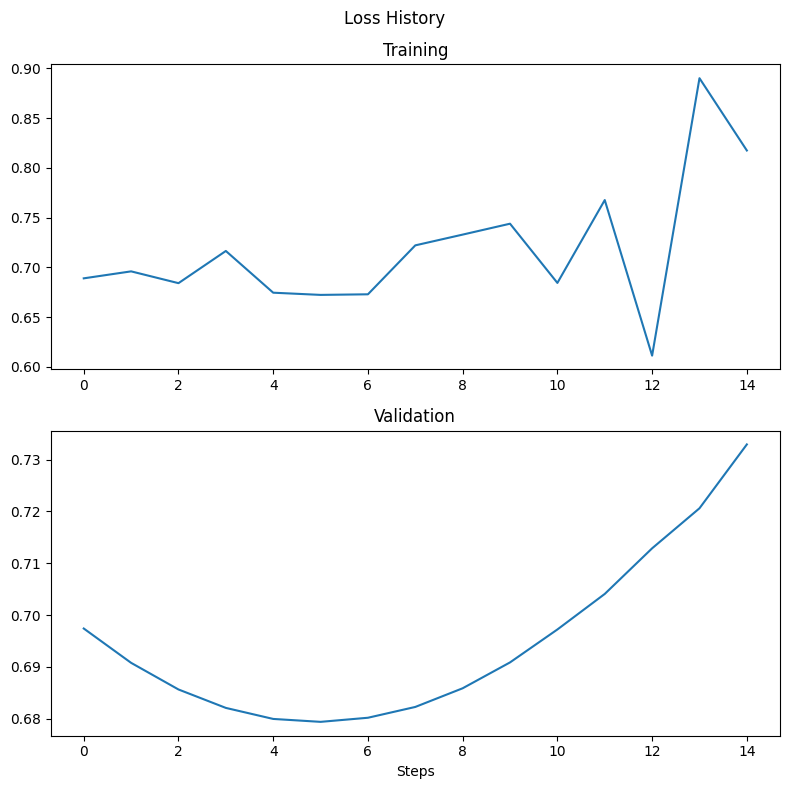

In [9]:
autoencoder._plot_loss_history(train_loss = train_loss, val_loss = val_loss)